<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [1]:
URL ="http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"

In [2]:
#Imported  all necessary libraries
import pandas as pd  #for data manipulation and analysis. 
import numpy as np  #used to perform a wide variety of mathematical operations on arrays.
import requests  #used by humans to interact with the language. 
import bs4  #used for web scraping purposes to pull the data out of HTML and XML files
from bs4 import BeautifulSoup
from tqdm import tqdm  #used for creating Progress Meters or Progress Bars. 
import time  #used to measure the execution time of small code snippets.
import random  #used to generate random numbers.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [3]:
## YOUR CODE HERE
#assigning 
r = requests.get(URL)# to upload url given for Indeed website.

soup = BeautifulSoup(r.text, 'html.parser')# for text reading 

jobs = soup.find_all(name='div', attrs={'class':"slider_container"}) #locating tags and classes.(Jobs,Salaries...)

In [4]:
#creating functions to get all needed information for web scraping Company Names,Jobs,Locations,Salaries,Summeries...
def extract_company(result):
    try:
        return result.find('span',{'class':'companyName'}).text
    except:
        return None

In [5]:
def extract_salary(result):
    try:
        return result.find('div',{'class':'attribute_snippet'}).text
    except:
        return None

In [6]:
def extract_location(result):   
    try:
        return result.find('div',{'class':'companyLocation'}).text
    except:
        return None

In [7]:
def extract_job(result):
    try:
        return result.find('h2', attrs={'class':'jobTitle'}).text
    except:
        return None

In [8]:
def extract_rating(result):
    try:
        return result.find('span', attrs={'class':'ratingNumber'}).text
    except:
        return None

In [9]:
def extract_snippet(result):
    try:
        return result.find('div', attrs={'class':'job-snippet'}).text
    except:
        return None

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

# London ,UK
url_template = "https://www.indeed.co.uk/jobs?q=data+science&l={}&start={}"
max_results_per_city = 10
results = []

for city in ['London']:
    for start in tqdm(range(0, max_results_per_city, 10)):
        r1 = requests.get(url_template.format(city,start))

        soup = BeautifulSoup(r1.text, 'html.parser')

        jobs = soup.find_all(name='div', attrs={'class':"result"}) # Grab the results from the request (as above)
        results.extend(jobs) # Append to the full set of results

YOUR_CITY = 'Toronto'

In [213]:
#I run all cities separately previously for better and faster result to get csv's, this is the entire # of cities.
#url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
#max_results_per_city = 10000
#results = []

#for city in ['Chicago', 'San+Francisco', 'Austin', 'Seattle',
             #'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas',
             #'Pittsburgh','Portland', 'Phoenix', 'Denver', 
            #'Houston', 'Miami','London','NY','WashingtonState','YOUR_CITY ']:
    #for start in tqdm(range(0, max_results_per_city, 10)):
        #time.sleep(random.randint(1,2))
        #r1 = requests.get(url_template.format(city,start))

        #soup = BeautifulSoup(r1.text, 'html.parser')

        #jobs = soup.find_all(name='div', attrs={'class':"slider_container"}) # Grab the results from the request (as above)
        #results.extend(jobs) # Append to the full set of results


100%|██████████| 1/1 [00:04<00:00,  4.10s/it]


#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [214]:
## YOUR CODE HERE
# Creating a dataframe from the results with all columns.
#df = pd.DataFrame({"Job Title":extract_job(result),"Company":extract_company(result),
     # "Location":extract_location(result),"Salary":extract_salary(result),
      #"Rating":extract_rating(result),"Summary":extract_snippet(result)} for result in results)

In [216]:
#df.head(10)

,Job Title,Company,Location,Salary,Rating,Summary
0,Data Scientist,TransUnion,"Chicago, IL 60661 (West Loop Gate area)+4 loca...",Full-time,3.8,\nThis position is responsible for supporting ...
1,Data Scientist,Northwestern Medicine,"Chicago, IL 60611 (Near North Side area)+1 loc...",Full-time,3.9,\nThe data engineers/scientists use their broa...
2,newData Scientist,"Blue Cross Blue Shield of IL, MT, NM, OK & TX","Chicago, IL+6 locations",Full-time,3.9,\nContribute to delivery of analytics and data...
3,newData Scientist - Python or R - Machine Lear...,Deloitte,"Chicago, IL 60606 (The Loop area)+13 locations",Full-time,4.0,\nExperience with structured and unstructured ...
4,newStatistical Forecaster / Data Scientist,PepsiCo,"Chicago, IL",None,3.8,\nUtilize Analytical capability and detailed d...
5,Data Scientist,Pareto Intelligence,"Chicago, IL 60654 (Loop area)",None,None,"\nPractical ability to visualize data, communi..."
6,newData Scientist,Hitachi Solutions Ltd,"Chicago, IL 60606 (The Loop area)",None,3.8,\nDesign strategies and propose algorithms to ...
7,Data Scientist (Machine Learning),Decision Spot,"Chicago, IL•Remote",None,None,\nDecision Spot is looking for data scientists...
8,newData Scientist,Northern Trust Corp.,"Chicago, IL 60603 (The Loop area)+1 location",None,3.8,\nThis position serves to empower applied data...
9,Data Scientist - Remote,Harley-Davidson,"Chicago, IL•Remote",Full-time,3.7,\nThis role may be expected to assist other da...


In [217]:
#in this raw sample consisting of 1319results the top	Data Scientist	Deloitte	Austin, TX	Full-time	4.0	
#will be looking further on collecting all of the cities I was able to srape and collect.
#df.describe()

,Job Title,Company,Location,Salary,Rating,Summary
count,240,240,240,67,201,240
unique,124,198,189,29,27,224
top,Data Scientist,Deloitte,"Houston, TX",Full-time,4.0,\nExperience in an ML engineer or data scienti...
freq,63,14,7,36,36,5


Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

In [11]:
#working with the Text data Regex is a powerful tool for data extraction, Cleaning and validation.
#replace() function is used to replace a string, regex, list, dictionary, series, number etc. from a dataframe.
#df.replace(to_replace="\n",value="",regex=True,inplace=True)
#df.head()

In [12]:
#df.shape

In [13]:
#in my drafts I saved for each city separately csv's.
#df.to_csv(r'/Users/oc/Desktop/GA/material/Projects/project 4/project-4/Jobs.csv',index=False, header=True)

In [14]:
#Austin,TX jobs
#city1=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsAustin.csv')

In [15]:
city1.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,Principal Data Scientist - Match Recommendations,Indeed,"Austin, TX•Temporarily Remote","$223,000 - $324,000 a year",4.3,Mentor and grow other software engineers and d...
1,Senior Data Scientist - Ranking Team,Indeed,"Austin, TX","$123,000 - $179,000 a year",4.3,Proactively research data and identify opportu...
2,Data Scientist I - 637,"O'Neil Global Advisors, Inc.","Austin, TX•Remote",NaN,NaN,Advanced skill with data science topics such a...


In [16]:
#Atlanta,GA jobs
#city2=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsAtlanta.csv')

In [17]:
city2.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,"Data Scientist, Optimization",Delta,"Atlanta, GA+2 locations",NaN,4.2,The Optimization team in CDI (Commercial Devel...
1,"newLead Data Scientist, AI Innovation and Life...",Kimberly-Clark,"Atlanta, GA",NaN,4.0,Lead and transform data science prototypes.Wor...
2,Lead Data Scientist,Confidential,"Atlanta, GA",NaN,NaN,Has some experience using the AWS big data tec...


In [19]:
#Chicago,IL jobs
#city3=pd.read_csv(r'//Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsChicago.csv')

In [20]:
city3.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,newData Scientist,"Blue Cross Blue Shield of IL, MT, NM, OK & TX","Chicago, IL+6 locations",Full-time,3.9,Contribute to delivery of analytics and data s...
1,Data Scientist,Northwestern Medicine,"Chicago, IL 60611 (Near North Side area)+1 loc...",Full-time,3.9,The data engineers/scientists use their broad ...
2,Data Scientist - Remote,Harley-Davidson,"Chicago, IL•Remote",Full-time,3.7,This role may be expected to assist other data...


In [21]:
#Dallas,TX jobs
#city4=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsDallas.csv')

In [22]:
city4.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,Behavioral Data Scientist,Microsoft,"Dallas, TX•Remote work available",Full-time,4.2,"Work with large, complex data sets.Experience ..."
1,Senior Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Dallas, TX","$116,200 a year",3.5,Experience in an ML engineer or data scientist...
2,newData Scientist,The Coca-Cola Company,"Plano, TX 75024",Full-time,3.9,Prior experience of developing and implanting ...


In [23]:
#Denver,CO jobs
#city5=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsDenver.csv')

In [24]:
city5.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,newData Scientist,Oracle,"Denver, CO+1 location•Remote","$99,333 - $178,795 a year",3.8,8+ years digital data analytics with large dig...
1,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Denver, CO+2 locations","$119,300 - $160,000 a year",3.5,Experience in an ML engineer or data scientist...
2,Senior Data Scientist,Verizon,"Denver, CO 80202 (Central Business District area)","$117,000 - $217,000 a year",3.9,Build machine learning data pipelines and fram...


In [25]:
#Huston,TX jobs
#city6=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsHouston.csv')

In [26]:
city6.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,newData Scientist,Red Dot Storage,"Houston, TX•Remote",NaN,4.0,Red Dot Storage is looking for a driven Data S...
1,Data & Applied Scientist,Microsoft,"Houston, TX",NaN,4.2,"O 2+ years of experience in data science, anal..."
2,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Houston, TX","$114,700 a year",3.5,Experience in an ML engineer or data scientist...


In [27]:
#I converted gbp into USD in a separate draft(London) notebook
#wrote a function that converted a salary string to a number, averaging salary range.:steps by step:
#df.drop_duplicates(subset=None, inplace=True)
#df=df[df.Salary.str.contains("year").fillna(False)]
#RM=df.Rating.mean()
#df.Rating.isnull().sum() 
#df.Rating.fillna(RM,inplace=True)#filled up 0 with mean value of RM
#df.dropna(inplace=True)
#function()str.contains year value only.
#df=df[df.Salary.str.contains("year")]
#from string import digits 
#numerals = digits + '-' + ','
#df.Salary=df.Salary.apply(lambda x : ''.join(c for c in x if c in numerals))
#wrote a function that takes a salary string and converts it to a number, averaging a salary range.
#df.Salary=df.Salary*1.37- coverted currency 
#df.to_csv(r'/Users/oc/Desktop/GA/material/Projects/project 4/project-4/Project 4 Salary/JobsLondonUS.csv');
#saved clean and useful,rounded int,in USD London data.

In [29]:
#London,UK jobs in USD
#city7=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsLondonUS.csv')

In [30]:
city7

,Job Title,Company,Location,Salary,Rating,Summary
0,Laboratory Administrator,C19Recruit,Battersea,32880.0,3.8,We are adding a whole shift to the Laboratory ...
1,Application Support Analyst PL/SQL - Scientific,Client Server,London•Remote,68500.0,4.0,Desirable: familiarity with sample management ...
2,Bioinformatician,CK Group,London+1 location,68500.0,4.2,Manage and advance existing bioinformatic algo...
3,Machine Learning/Computer Vision Scientist (Ho...,re&m,London•Remote,51375.0,3.8,FMachine Learning Engineers/Computer Vision Sc...
4,Bioinformatician,CK Group,London+1 location,68500.0,4.2,CK Group are recruiting for a Bioinformatician...


In [32]:
#LA,CA jobs
#city8=pd.read_csv(r'//Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsLosAngeles.csv')

In [33]:
city8.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,Data Scientist,Clock Foundation,"Torrance, CA 90502•Remote","$83,000 - $117,883 a year",NaN,Experience working alongside experimental pers...
1,newData Scientist,MWIDM Inc.,"Los Angeles, CA 90032",$50 - $150 an hour,4.7,Create new experimental frameworks to collect ...
2,newData Scientist,Trusaic,"Los Angeles, CA 90010 (Koreatown area)",NaN,3.1,"Filter, sort, compute summary statistics, pivo..."


In [34]:
#Miami,FL jobs
#city9=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsMiami.csv')

In [35]:
city9.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,Data Scientist Engineer,Pri Global Inc,"Miami, FL",$55 - $60 an hour,NaN,Experience in building and deploying productio...
1,newData Scientist,Southern Glazer's Wine and Spirits,"Miramar, FL+1 location",NaN,3.5,Collaborate with Trade Development Team to dev...
2,newData Scientist,Greenbox Capital,"Miami, FL 33137 (Upper Eastside area)",NaN,3.5,Provide mentorship to junior data scientists i...


In [36]:
#NY,NY jobs
#city10=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsNY.csv')

In [37]:
city10.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,"newAssociate Data Scientist or Data Scientist,...",Spotify,"New York, NY+9 locations•Remote",NaN,4.3,\nCommunicate data-driven insights and recomme...
1,newJR. DATA SCIENTIST,ViacomCBS,"New York, NY 10036 (Midtown area)",NaN,3.9,"\nWork with data scientists, data engineers, a..."
2,"Data Scientist, Game Analytics & Strategy",the NBA,"New York, NY 10022 (Midtown area)+1 location",NaN,4.2,\nPerform exploratory analysis of new data sou...


In [38]:
#Philadelphia,PA jobs
#city11=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsPhiladelphia.csv')


In [39]:
city11.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Philadelphia, PA","$114,700 a year",3.5,Experience in an ML engineer or data scientist...
1,newData Scientist,AmeriHealth Caritas,"Newtown Square, PA+1 location",NaN,3.3,"Defines problems, collects data, applies advan..."
2,newData Scientist,Sapient Industries,"Philadelphia, PA 19103 (Logan Square area)",NaN,NaN,5+ years of working with data and data insight...


In [40]:
#Phoenix,AZ jobs
#city12=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsPhoenix.csv')

In [41]:
city12.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Phoenix, AZ","$114,700 a year",3.5,Experience in an ML engineer or data scientist...
1,newData Scientist (Part,Caris Life Sciences,"Phoenix, AZ 85040 (South Mountain area)+3 loca...",NaN,2.7,Manipulate and process large multisource data ...
2,Lead Data Scientist,DISCOUNT TIRE,"Scottsdale, AZ",NaN,3.9,Advises technology partners on new data source...


In [42]:
#Pittsburgh,PA jobs
#city13=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsPittsburgh.csv')

In [43]:
city13.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,newData Scientist,The University of Pittsburgh,"Pittsburgh, PA","$46,644 - $76,440 a year",4.2,Several years experience in data management; e...
1,newData Scientist II,Honeywell,"Pittsburgh, PA 15222 (Strip District area)",NaN,3.7,Full term of experience must include: applying...
2,Data Scientist - Entry Level,Govini,"Pittsburgh, PA+1 location",NaN,2.5,"As part of our team, you must be a data nerd w..."


In [44]:
#Portland,OR jobs
#city14=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsPortland.csv')


In [45]:
city14.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Portland, OR","$114,700 a year",3.5,Experience in an ML engineer or data scientist...
1,newData Scientist,Intel,"Hillsboro, OR 97124+2 locations",Full-time,4.1,Build proofs of concept locally and define and...
2,Data Scientist,Nike,"Beaverton, OR+3 locations",Full-time,4.1,"Partner with data scientists and researchers, ..."


In [46]:
#San Fransisco,CA jobs
#city15=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsSanFrancisco.csv')

In [47]:
city15.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,"Data Scientist I, Product Analytics",Tinder,"San Francisco, CA",NaN,4.6,Experience with SQL and data visualization too...
1,"Staff Data Scientist, Virtual HQ",Slack,"San Francisco, CA•Remote work available","$142,400 a year",3.8,Experience working with data technologies that...
2,University Grad Data Scientist,Pinterest,"San Francisco, CA 94103 (South of Market area)...",NaN,4.2,Work with product managers and engineers to de...


In [48]:
#Seatlle,WA jobs
#city16=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsSeattle.csv')

In [49]:
city16.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,Data Scientist,Opanga Networks,"Seattle, WA 98164 (Downtown area)","From $65,000 a year",NaN,Enhancing data collection procedures to includ...
1,Data Scientist,American Capital Group,"Bellevue, WA 98005 (Belred area)","$150,000 a year",2.9,Create a data lake for raw data and a data war...
2,Principal Data Scientist - Match Recommendations,Indeed,"Seattle, WA•Temporarily Remote","$223,000 - $324,000 a year",4.3,Mentor and grow other software engineers and d...


In [ ]:
#Same cleaning and currency converting in draft Toronto notebook.

In [50]:
#Toronto jobs in USD
#city17=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsTorontoUS.csv')

In [51]:
city17.head(3)

,Job Title,Company,Location,Salary,Rating,Summary
0,data scientist,Tiger Analytics Inc.,"Toronto, ON•Remote",96000.0,3.823214,"Research and document data requirements, data ..."
1,newData Scientist,EatSleepRide,"Toronto, ON•Temporarily Remote",69713.2,3.823214,· Normalize & classify the data sets*.· Experi...
2,newInformation Analyst,Elections Ontario,"Toronto, ON",53110.4,4.300000,Conduct periodic data analyses to monitor data...


In [53]:
#Washington State,jobs
#city18=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/JobsWashington State.csv')

In [54]:
city18.head()

,Job Title,Company,Location,Salary,Rating,Summary
0,newdata scientist (multiple openings) - Seattl...,Starbucks,"Seattle, WA•Remote work available",NaN,4.0,"As a data scientist, you will….The data scient..."
1,Data Scientist,Microsoft,"Bellevue, WA+13 locations",NaN,4.2,1+ years of experience in statistical modellin...
2,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Seattle, WA","$114,700 a year",3.5,Experience in an ML engineer or data scientist...
3,Data Scientist - ProServe,"Amazon Web Services, Inc.",Washington State,"$114,700 a year",3.5,Experience in an ML engineer or data scientist...
4,"Data Scientist 1, People Analytics - remote",Nordstrom Inc,"Seattle, WA+10 locations•Remote",NaN,3.9,Prototype and build data pipelines.The Data Sc...


In [55]:
df=pd.concat([city1,city2,city3,city4,city5,city6,city7,city8,city9,city10,city11,city12,city13,city14,city15,city16,city17,city18],axis=0)

In [56]:
df.shape

(16485, 6)

In [57]:
#dropped duplicates and have 5123 rows, 6columns
df=df.drop_duplicates()
df.shape

(5123, 6)

In [58]:
df.head()

,Job Title,Company,Location,Salary,Rating,Summary
0,Principal Data Scientist - Match Recommendations,Indeed,"Austin, TX•Temporarily Remote","$223,000 - $324,000 a year",4.3,Mentor and grow other software engineers and d...
1,Senior Data Scientist - Ranking Team,Indeed,"Austin, TX","$123,000 - $179,000 a year",4.3,Proactively research data and identify opportu...
2,Data Scientist I - 637,"O'Neil Global Advisors, Inc.","Austin, TX•Remote",NaN,NaN,Advanced skill with data science topics such a...
3,Sr. Data Scientist,Charles Schwab,"Austin, TX•Remote work available","$122,700 - $200,300 a year",3.9,Document technical designs and data engineerin...
4,newLead Data Scientist,Insight Global,"Austin, TX 78735 (East Oak Hill area)","$140,000 - $160,000 a year",3.9,You will be an expert at understanding our goa...


In [59]:
df.tail()

,Job Title,Company,Location,Salary,Rating,Summary
670,Senior Artificial Intelligence/ Machine Learni...,Owl Labs,"Seattle, WA•Temporarily Remote",NaN,NaN,"Experience with SQL, and data modeling.Owl Lab..."
672,Sr. Software Engineer (Machine learning) - Rec...,Smartsheet,Washington State•Remote,NaN,3.9,We are looking for a Senior Software Engineer ...
673,"Principal Software Engineer, NLP/ ML",Truveta,Washington State•Remote,NaN,NaN,Excellent problem solving and data analysis sk...
713,Senior Machine Learning Ops Engineer (Remote),Absci,Washington State•Remote,NaN,NaN,Working closely with AI scientists to support ...
714,Senior ML Engineer - Remote,LivePerson,Washington State•Remote,NaN,3.7,We are looking for a Senior ML Engineer to env...


In [60]:
#Rating column has 3850 val
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5123 entries, 0 to 714
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Job Title  5123 non-null   object 
 1   Company    5123 non-null   object 
 2   Location   5123 non-null   object 
 3   Salary     1910 non-null   object 
 4   Rating     3850 non-null   float64
 5   Summary    5123 non-null   object 
dtypes: float64(1), object(5)
memory usage: 280.2+ KB


In [61]:
#defining mean of Rating column
dfr=df.Rating.mean()
dfr

3.7842541743970264

In [62]:
dfr=round(dfr,1)
dfr

3.8

In [63]:
#filling in mean value to the entire Rating column of each row
df.Rating.fillna(dfr,inplace=True)

In [64]:
#Pandas dropna() method allows the user to analyze and drop Rows/Columns with Null values .
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 515
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Job Title  1910 non-null   object 
 1   Company    1910 non-null   object 
 2   Location   1910 non-null   object 
 3   Salary     1910 non-null   object 
 4   Rating     1910 non-null   float64
 5   Summary    1910 non-null   object 
dtypes: float64(1), object(5)
memory usage: 104.5+ KB


In [65]:
df.Salary.value_counts()

Full-time                    1354
Full-time +1                   31
Contract                       30
Part-time                      11
Part-time +1                   11
                             ... 
$52,100 - $63,400 a year        1
$91,500 - $190,100 a year       1
$66,221 - $160,390 a year       1
$59,088 - $88,000 a year        1
$35 - $40 an hour               1
Name: Salary, Length: 302, dtype: int64

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [66]:
## YOUR CODE HERE
df = df[df.Salary.str.contains('year').fillna(False)] 

In [67]:
df.shape

(358, 6)

After I scraped,cleaned and removed dublicates from my dataset , I've decided to use a different dataset csv (thanks to Edmond) wich has more results .

In [68]:
# The data is already freed from dublicates.
df = df.drop_duplicates()
df

,Job Title,Company,Location,Salary,Rating,Summary
0,Principal Data Scientist - Match Recommendations,Indeed,"Austin, TX•Temporarily Remote","$223,000 - $324,000 a year",4.3,Mentor and grow other software engineers and d...
1,Senior Data Scientist - Ranking Team,Indeed,"Austin, TX","$123,000 - $179,000 a year",4.3,Proactively research data and identify opportu...
3,Sr. Data Scientist,Charles Schwab,"Austin, TX•Remote work available","$122,700 - $200,300 a year",3.9,Document technical designs and data engineerin...
4,newLead Data Scientist,Insight Global,"Austin, TX 78735 (East Oak Hill area)","$140,000 - $160,000 a year",3.9,You will be an expert at understanding our goa...
5,Senior Data Scientist,Harnham,"Austin, TX•Remote work available","$130,000 - $150,000 a year",4.6,Experience with the cleaning and manipulation ...
...,...,...,...,...,...,...
285,newSenior Data Scientist - Consumer Decision S...,Glassdoor,"Seattle, WA+2 locations","$136,100 - $170,100 a year",4.2,"Conceptualize and build data models, tools, an..."
286,Principal Data Scientist - Match Recommendations,Indeed,"Seattle, WA+2 locations•Temporarily Remote","$223,000 - $324,000 a year",4.3,Mentor and grow other software engineers and d...
290,Senior Data Scientist,NCI Information Systems Inc.,"Fort Lewis, WA","From $150,000 a year",3.6,Handle processing and index requests against h...
328,newSenior Data Scientist - Consumer Decision S...,Glassdoor,"Seattle, WA","$136,100 - $170,100 a year",4.2,"Conceptualize and build data models, tools, an..."


#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [69]:
## YOUR CODE HERE
## importing string library function 
from string import digits
numerals = digits + '-' + ','

In [70]:
df.Salary = df.Salary.apply(lambda x : ''.join(c for c in x if c in numerals))

axis=1 (or axis='columns') is vertical axis. To take it further, if you use pandas method drop, to remove columns or rows, if you specify axis=1 you will be removing columns. If you specify axis=0 you will be removing rows from dataset

In [71]:
#When using expand=True , the split elements will expand out into separate columns. 
df.Salary = df.Salary.str.replace(',','').str.replace('+','').str.split('-', expand=True).astype(float).mean(axis=1)

<ipython-input-71-323ce376225c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Salary = df.Salary.str.replace(',','').str.replace('+','').str.split('-', expand=True).astype(float).mean(axis=1)


In [72]:
df.Salary.describe()

count       358.000000
mean     121204.234637
std       41688.104236
min       40500.000000
25%       93812.500000
50%      114700.000000
75%      141137.500000
max      367000.000000
Name: Salary, dtype: float64

### Save your results as a CSV

In [73]:
## YOUR CODE HERE
#df.to_csv(r'/Users/oc/Desktop/GA/material/Projects/project 4/project-4/Project 4 Salary/My clean Data Jobs358.csv',index=False)

### Load in the the data of scraped salaries

In [75]:
##YOUR CODE HERE
#After I scraped,cleaned and removed dublicates from my dataset 
#I've decided to use a different dataset csv (thanks to Edmond) wich has more results .

#dfs=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/indeed_clean_data2.csv')


In [76]:
dfs

,Company,Title,Description,Location,Remote,Salary,Salary_rate,Salary_HILO,new_col
0,Michael Page UK,Data Modelling Analyst / Data Scientist (6 Mon...,Experience of using school data or assessment ...,Cardiff,NaN,32500.0,year,LOW,Cardiff
1,Randstad Business Support,Dutch and English Speaking Data Administrator,Great communication and data presentation skil...,Cardiff,NaN,21000.0,year,LOW,Cardiff
2,NHS Wales Informatics Service,Information Officer (Data Quality),The role is focused on clearly identifying the...,Cardiff,NaN,27761.0,year,LOW,Cardiff
3,Creditsafe Services Ltd,Junior Data Engineer,The role will define and build data pipelines ...,Cardiff,NaN,25000.0,year,LOW,Cardiff
4,Cardiff University,"Research Assistant, Data Management, Schools H...",To support the development and implementation ...,Cardiff,NaN,29688.5,year,LOW,Cardiff
...,...,...,...,...,...,...,...,...,...
1495,realTime,Data Engineer - Remote Hiring - Belfast,Experience working in a modern Data Engineerin...,Belfast,Remote,40000.0,year,LOW,Belfast
1496,Abacus Professional Recruitment,Lead Data Analyst,Perform data quality checks to ensure data is ...,Belfast,Remote,42500.0,year,HIGH,Belfast
1497,Queen's University Belfast,Lecturer in Business Analytics,"Experience of data management, statistical ana...",Belfast,NaN,43974.0,year,HIGH,Belfast
1498,Apple Recruitment,Marketing Communications Specialist,Experience managing external agencies includin...,Belfast,NaN,26000.0,year,LOW,Antrim


In [77]:
#droppped unimportant columns to narrow 2 datasets
dfs.drop(['Remote','Salary_HILO','new_col','Salary_rate'], axis = 1,inplace = True)

In [78]:
dfs.head()

,Company,Title,Description,Location,Salary
0,Michael Page UK,Data Modelling Analyst / Data Scientist (6 Mon...,Experience of using school data or assessment ...,Cardiff,32500.0
1,Randstad Business Support,Dutch and English Speaking Data Administrator,Great communication and data presentation skil...,Cardiff,21000.0
2,NHS Wales Informatics Service,Information Officer (Data Quality),The role is focused on clearly identifying the...,Cardiff,27761.0
3,Creditsafe Services Ltd,Junior Data Engineer,The role will define and build data pipelines ...,Cardiff,25000.0
4,Cardiff University,"Research Assistant, Data Management, Schools H...",To support the development and implementation ...,Cardiff,29688.5


In [79]:
#in the order to concat my data and the  new scraped data I need to prepair and narrow down the columns and rows.
dfs.rename(columns={'Title':'Job Title','Description':'Summary',},inplace=True)

In [80]:
dfs.head()

,Company,Job Title,Summary,Location,Salary
0,Michael Page UK,Data Modelling Analyst / Data Scientist (6 Mon...,Experience of using school data or assessment ...,Cardiff,32500.0
1,Randstad Business Support,Dutch and English Speaking Data Administrator,Great communication and data presentation skil...,Cardiff,21000.0
2,NHS Wales Informatics Service,Information Officer (Data Quality),The role is focused on clearly identifying the...,Cardiff,27761.0
3,Creditsafe Services Ltd,Junior Data Engineer,The role will define and build data pipelines ...,Cardiff,25000.0
4,Cardiff University,"Research Assistant, Data Management, Schools H...",To support the development and implementation ...,Cardiff,29688.5


In [81]:
#converted curency of GBP to USD
dfs.Salary=dfs.Salary*1.37

In [82]:
dfs.Salary

0       44525.000
1       28770.000
2       38032.570
3       34250.000
4       40673.245
          ...    
1495    54800.000
1496    58225.000
1497    60244.380
1498    35620.000
1499    28085.000
Name: Salary, Length: 1500, dtype: float64

#### Pseudo code for decimals remove  from Salary column.

value1= dfs.Salary
lst = []
for each in value1:
    lst.append(str(each).split('.')[0])
final_list = [int(i)for i in lst],(inplace = True)
print(final_list)
    
    

In [84]:
#dfm=pd.read_csv(r'/Users/oc/Desktop/GA/material/Projects/project-4/project-4/Project 4 Salary/My clean Data Jobs358.csv')

In [85]:
dfm.head()

,Job Title,Company,Location,Salary,Rating,Summary
0,Principal Data Scientist - Match Recommendations,Indeed,"Austin, TX•Temporarily Remote",273500.0,4.3,Mentor and grow other software engineers and d...
1,Senior Data Scientist - Ranking Team,Indeed,"Austin, TX",151000.0,4.3,Proactively research data and identify opportu...
2,Sr. Data Scientist,Charles Schwab,"Austin, TX•Remote work available",161500.0,3.9,Document technical designs and data engineerin...
3,newLead Data Scientist,Insight Global,"Austin, TX 78735 (East Oak Hill area)",150000.0,3.9,You will be an expert at understanding our goa...
4,Senior Data Scientist,Harnham,"Austin, TX•Remote work available",140000.0,4.6,Experience with the cleaning and manipulation ...


In [86]:
#dropped Rating column to narrow down the columns in both data frames for better results
dfm.drop(['Rating'], axis = 1,inplace=True)

In [87]:
dfm.head()

,Job Title,Company,Location,Salary,Summary
0,Principal Data Scientist - Match Recommendations,Indeed,"Austin, TX•Temporarily Remote",273500.0,Mentor and grow other software engineers and d...
1,Senior Data Scientist - Ranking Team,Indeed,"Austin, TX",151000.0,Proactively research data and identify opportu...
2,Sr. Data Scientist,Charles Schwab,"Austin, TX•Remote work available",161500.0,Document technical designs and data engineerin...
3,newLead Data Scientist,Insight Global,"Austin, TX 78735 (East Oak Hill area)",150000.0,You will be an expert at understanding our goa...
4,Senior Data Scientist,Harnham,"Austin, TX•Remote work available",140000.0,Experience with the cleaning and manipulation ...


In [88]:
#concatenated 2 scraped databases.
dfc=pd.concat([dfm,dfs],axis=0)

In [89]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Job Title  1858 non-null   object 
 1   Company    1858 non-null   object 
 2   Location   1858 non-null   object 
 3   Salary     1858 non-null   float64
 4   Summary    1858 non-null   object 
dtypes: float64(1), object(4)
memory usage: 87.1+ KB


In [90]:
dfc.head(10)

,Job Title,Company,Location,Salary,Summary
0,Principal Data Scientist - Match Recommendations,Indeed,"Austin, TX•Temporarily Remote",273500.0,Mentor and grow other software engineers and d...
1,Senior Data Scientist - Ranking Team,Indeed,"Austin, TX",151000.0,Proactively research data and identify opportu...
2,Sr. Data Scientist,Charles Schwab,"Austin, TX•Remote work available",161500.0,Document technical designs and data engineerin...
3,newLead Data Scientist,Insight Global,"Austin, TX 78735 (East Oak Hill area)",150000.0,You will be an expert at understanding our goa...
4,Senior Data Scientist,Harnham,"Austin, TX•Remote work available",140000.0,Experience with the cleaning and manipulation ...
5,newLead Data Scientist,S&P Global,"Austin, TX 73301 (St Edwards area)",105900.0,"Publicly demonstrated data science competency,..."
6,Senior Data Scientist,Valkyrie,"Austin, TX 78701 (Downtown area)",112500.0,We are looking for candidates who are interest...
7,"Data Scientist, Decision Science (Marketing an...",Glassdoor,"Austin, TX",134100.0,Translate data insights into recommendations f...
8,Product Analyst/Data Scientist,Salesforce,"Austin, TX",82400.0,"Each team is made up of data scientists, engin..."
9,Senior Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Austin, TX",116200.0,Experience in an ML engineer or data scientist...


In [91]:
#data is clean and duplicates free
dfc.drop_duplicates(subset=None, inplace=True)

In [92]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Job Title  1858 non-null   object 
 1   Company    1858 non-null   object 
 2   Location   1858 non-null   object 
 3   Salary     1858 non-null   float64
 4   Summary    1858 non-null   object 
dtypes: float64(1), object(4)
memory usage: 87.1+ KB


In [93]:
dfc.Salary.describe()

count      1858.000000
mean      82156.084263
std       56451.333862
min         342.500000
25%       44525.000000
50%       65102.057500
75%      110000.000000
max      727278.200000
Name: Salary, dtype: float64

In [94]:
dfc['Salary'].round(decimals = 1)

0       273500.0
1       151000.0
2       161500.0
3       150000.0
4       140000.0
          ...   
1495     54800.0
1496     58225.0
1497     60244.4
1498     35620.0
1499     28085.0
Name: Salary, Length: 1858, dtype: float64

In [95]:
dfc.Salary

0       273500.00
1       151000.00
2       161500.00
3       150000.00
4       140000.00
          ...    
1495     54800.00
1496     58225.00
1497     60244.38
1498     35620.00
1499     28085.00
Name: Salary, Length: 1858, dtype: float64

In [96]:
dfc.head()

,Job Title,Company,Location,Salary,Summary
0,Principal Data Scientist - Match Recommendations,Indeed,"Austin, TX•Temporarily Remote",273500.0,Mentor and grow other software engineers and d...
1,Senior Data Scientist - Ranking Team,Indeed,"Austin, TX",151000.0,Proactively research data and identify opportu...
2,Sr. Data Scientist,Charles Schwab,"Austin, TX•Remote work available",161500.0,Document technical designs and data engineerin...
3,newLead Data Scientist,Insight Global,"Austin, TX 78735 (East Oak Hill area)",150000.0,You will be an expert at understanding our goa...
4,Senior Data Scientist,Harnham,"Austin, TX•Remote work available",140000.0,Experience with the cleaning and manipulation ...


In [97]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Job Title  1858 non-null   object 
 1   Company    1858 non-null   object 
 2   Location   1858 non-null   object 
 3   Salary     1858 non-null   float64
 4   Summary    1858 non-null   object 
dtypes: float64(1), object(4)
memory usage: 87.1+ KB


In [98]:
#Load in the  data of scraped salaries
#dfc.to_csv(r'/Users/oc/Desktop/GA/material/Projects/project 4/project-4/Project 4 Salary/CombinedCleanSalary&JobsData.csv')

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [99]:
## YOUR CODE HERE
dfc.Salary.describe()

count      1858.000000
mean      82156.084263
std       56451.333862
min         342.500000
25%       44525.000000
50%       65102.057500
75%      110000.000000
max      727278.200000
Name: Salary, dtype: float64

In [100]:
from scipy import stats #importing scipy stats for probabilistic distributions and statistical operations.

def drop_numerical_outliers(dfc, z_thresh=3):
    #thresh takes integer value which tells minimum amount of na values to drop
    # Limits(constrains) will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = dfc.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    dfc.drop(dfc.index[~constrains], inplace=True)



In [101]:
# dropped the outliers
drop_numerical_outliers(dfc)

In [102]:
# from 1858 rows have 1832 rows left  
dfc.shape

(1832, 5)

In [103]:
#defining Salary median to be able to add a new column with its median value(booleans 0/1)
dfc.Salary.median()

65075.00000000001

In [104]:
#creating a new column HILO based on median salary & 1=higher than median Salary, 0=lower than median Salary.
dfc['Salary_HILO']=dfc.Salary.apply(lambda x : 1 if x > dfc.Salary.median() else 0)

In [105]:
dfc.head()

,Job Title,Company,Location,Salary,Summary,Salary_HILO
1,Senior Data Scientist - Ranking Team,Indeed,"Austin, TX",151000.0,Proactively research data and identify opportu...,1
2,Sr. Data Scientist,Charles Schwab,"Austin, TX•Remote work available",161500.0,Document technical designs and data engineerin...,1
3,newLead Data Scientist,Insight Global,"Austin, TX 78735 (East Oak Hill area)",150000.0,You will be an expert at understanding our goa...,1
4,Senior Data Scientist,Harnham,"Austin, TX•Remote work available",140000.0,Experience with the cleaning and manipulation ...,1
5,newLead Data Scientist,S&P Global,"Austin, TX 73301 (St Edwards area)",105900.0,"Publicly demonstrated data science competency,...",1


#### Thought experiment: What is the baseline accuracy for this model?

In [106]:
## YOUR CODE HERE
#With normalize set to True , returns the relative frequency by dividing all values by the sum of values.
dfc['Salary_HILO'].value_counts(normalize=True)

0    0.506004
1    0.493996
Name: Salary_HILO, dtype: float64

In [107]:
#max normalization is one of the most common ways to normalize data.
dfc['Salary_HILO'].value_counts(normalize=True).max()

0.506004366812227

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [108]:
## YOUR CODE HERE
#y-target
#dummifying Location.
#A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value.
X=pd.get_dummies(dfc['Location'])
y=dfc.Salary_HILO

In [109]:
#importing the sklearn for model 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=1)

In [111]:
#
#Train-Test Split Evaluation.
#The train-test split is a technique for evaluating the performance of a machine learning algorithm. 
#It can be used for classification or regression problems and can be used for any supervised learning algorithm.
#xrandom_stateint, RandomState instance or None, default=None
#Controls the shuffling applied to the data before applying the split.
#Pass an int for reproducible output across multiple function calls. 

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
#StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. 
#In short, it standardizes the data. Standardization is useful for data which has negative values. 
#It arranges the data in a standard normal distribution

In [114]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [116]:
log = LogisticRegression( solver='liblinear', multi_class='ovr', penalty="l2")
log.fit(X_train, y_train)
yhat = log.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
#yhat is the predicted value of y (the dependent variable) in a regression equation. 
#It can also be considered to be the average value of the response variable.
print('Accuracy score:', accuracy*100)#multiplying by 100 to get rid of decimals
print("Log CV score:", cross_val_score(log, X_train, y_train, cv=5).mean())
#choosing 5 cv folds and it's mean 
print('Logistic Regression Train Score:', log.score(X_train,y_train))
print('Logistic Regression Test Score:', log.score(X_test,y_test))

Accuracy score: 72.20708446866485
Log CV score: 0.6559726962457338
Logistic Regression Train Score: 0.6750853242320819
Logistic Regression Test Score: 0.7220708446866485


In [117]:
#The value of 𝑏₀,also called the intercept,shows the point where the estimated regression line crosses the 𝑦 axis. 
#It is the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. 
#The value of 𝑏₁ determines the slope of the estimated regression line.

In [118]:
print(log.intercept_)
print(log.coef_)
#The coef_ contain the coefficients for the prediction of each of the targets. 
#It is also the same as if you trained a model to predict each of the targets separately.

[0.49803837]
[[ 0.13096567  0.13096567  0.13096567  0.          0.13096567  0.26174559
   0.18516967  0.          0.          0.          0.13096567  0.
   0.22673198  0.13096567  0.13096567  0.18516967  0.13096567  0.
   0.26174559  0.13096567  0.          0.          0.13096567  0.13096567
  -0.15994171 -0.15994171  0.18516967  0.13096567  0.          0.13096567
   0.22673198  0.13096567 -0.22571912 -0.2218758   0.13096567  0.
   0.         -0.30751177  0.32041972  0.29257118  0.18516967 -0.23326055
   0.13096567  0.13096567  0.13096567 -0.09108162 -0.2501423  -0.15994171
   0.          0.26174559  0.13096567  0.13096567 -0.15994171 -0.15994171
   0.18516967  0.          0.          0.13096567  0.18516967  0.13096567
   0.18516967  0.13096567  0.18516967  0.18516967  0.13096567  0.13096567
   0.          0.          0.13096567  0.16338122  0.13096567  0.18516967
   0.13096567  0.13096567  0.          0.13096567  0.13096567 -0.15994171
   0.13096567  0.          0.13096567  0.13096567

In [119]:
#Calculate the absolute value element-wise. np. abs is a shorthand for this function.
#abs() function to compute the absolute values.
#The zip() function combines items from each of the specified iterables.
#The return value is a list of tuples where the items of each passed iterable at same index are paired together.
#sort_values(column, ascending=False) to sort a pd.DataFrame in descending order based on the values in column . print(df).
Coeff = pd.DataFrame(list(zip(X.columns,log.coef_[0], np.abs(log.coef_[0]))), columns=['Var','Coef', 'Coef_abs']).sort_values(by='Coef_abs', ascending=False)




In [120]:
Coeff

,Var,Coef,Coef_abs
180,"Queens, NY 11101",0.346011,0.346011
113,Liverpool,-0.338098,0.338098
110,Leeds,-0.329519,0.329519
38,"Boulder, CO",0.320420,0.320420
206,"Seattle, WA+1 location",0.320420,0.320420
...,...,...,...
20,"Austin, TX 73301 (St Edwards area)+1 location",0.000000,0.000000
21,"Austin, TX 73301 (St Edwards area)+1 location•...",0.000000,0.000000
79,"Denver, CO 80237 (Hampden South area)",0.000000,0.000000
74,"Denver, CO 80202 (Union Station area)",0.000000,0.000000


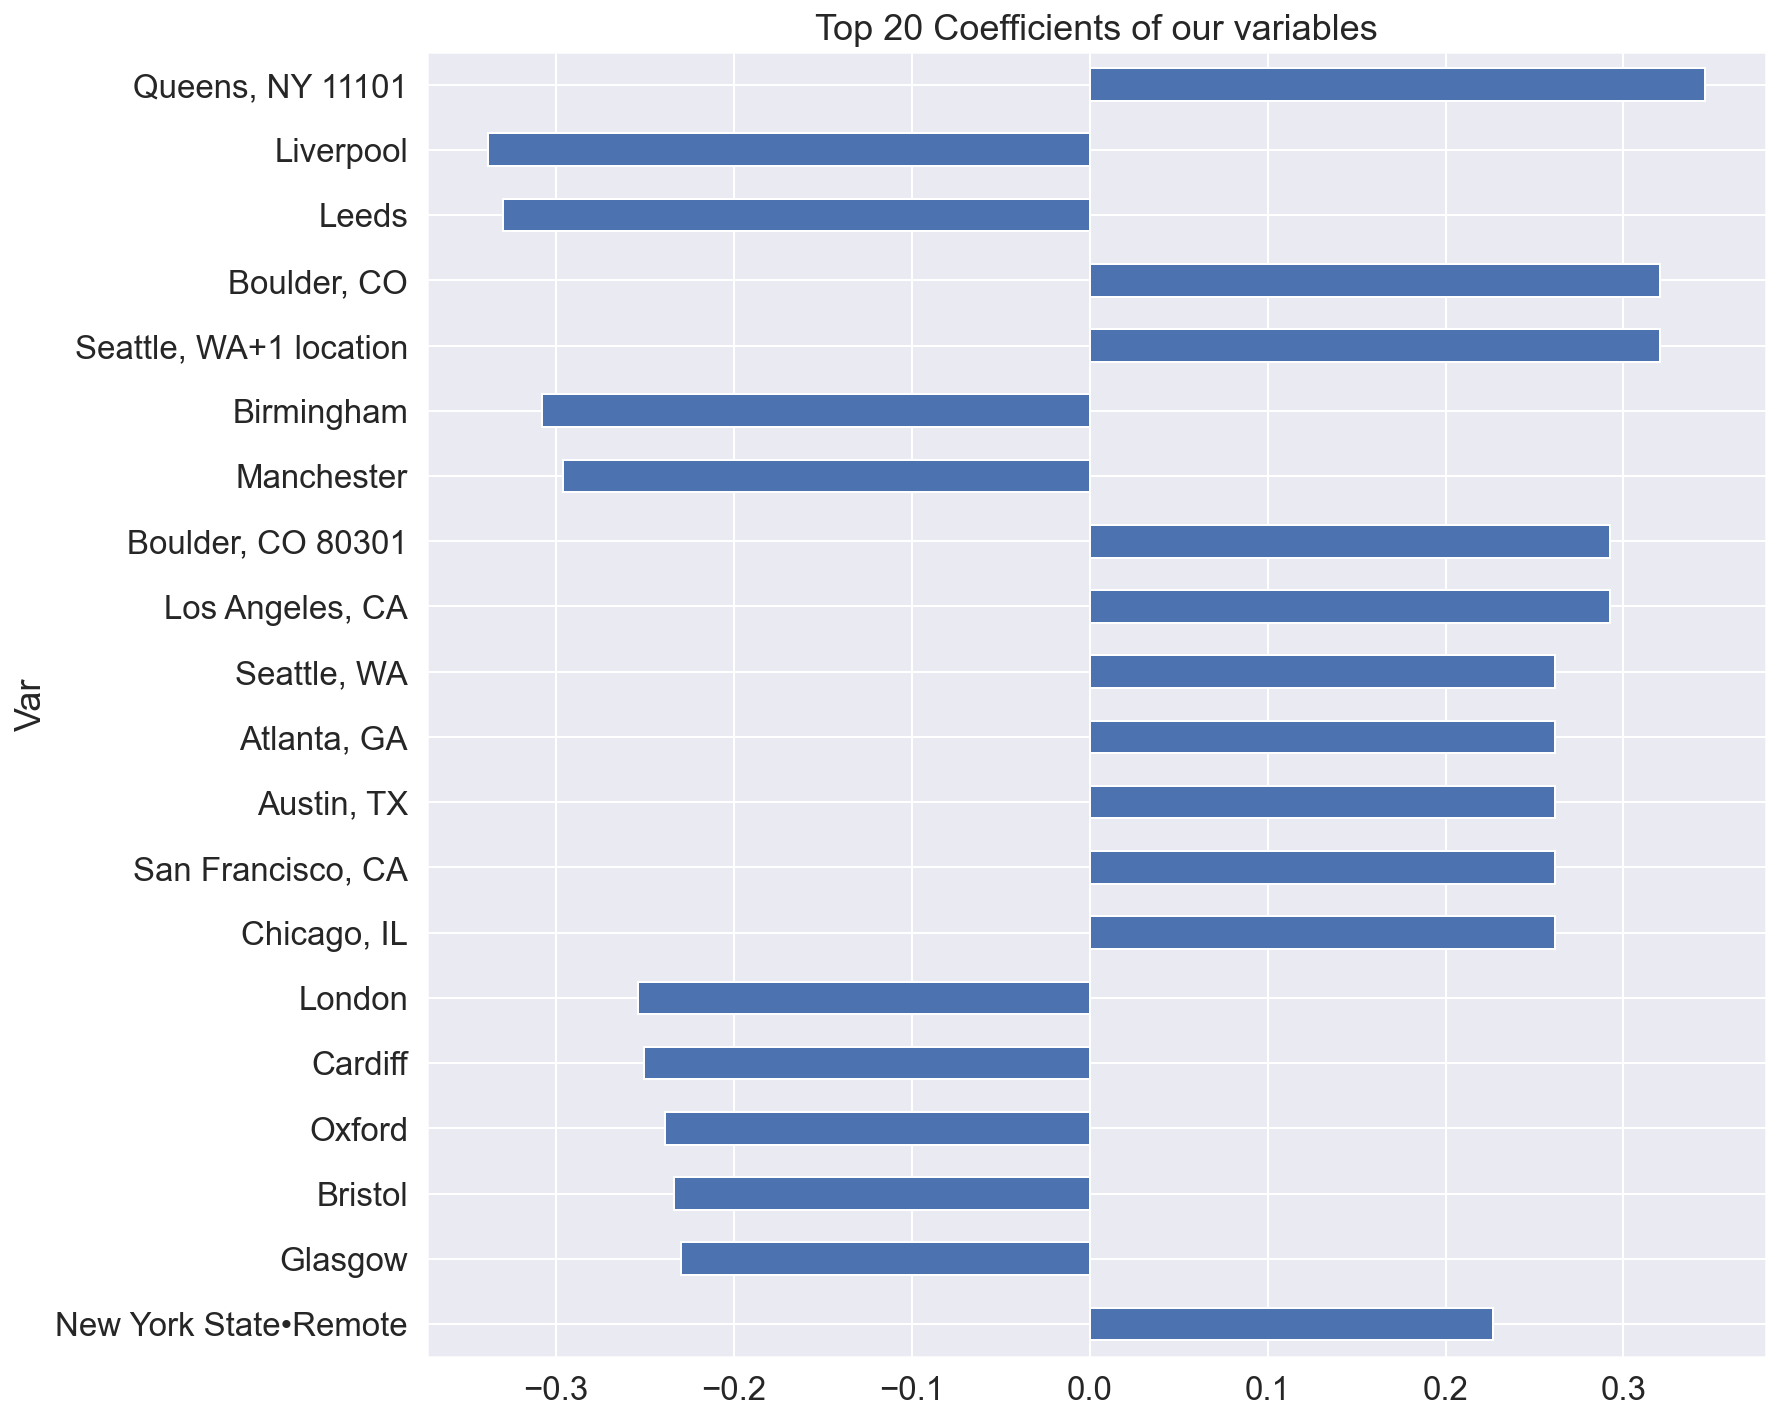

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)#Getting the parameters that control the scaling of plot elements.

%config InlineBackend.figure_format = 'retina'
#the definition of the displayed plot is-retina quality.
#Any display with retina resolution will make the figures look better.
%matplotlib inline
Coeff.head(20).plot(kind='barh',x=0,y=1,figsize=(12,12),legend=False,title='Top 20 Coefficients of our variables', sort_columns=True)
plt.gca().invert_yaxis()#setted up the parameters.

#Display the coefficients/feature importances and write a short summary of what they mean.


From the bar chart shows the coeficient Top 20 var. Locations: Queens,NY;Boulder,CO;Seattle,WA;LA,CA and several others are showing strong positive coef. results,that means that in these Locations have higher impact on determening whever the Salary is above or below the median. On the over hand there is also a negative coef. results for Locations: Birmingham,London,Manchester,Cardiff,Oxford&and few more as it displayed on bar chart above. 



KNN: K Nearest Neighbor is one of the fundamental algorithms in machine learning. Machine learning models use a set of input values to predict output values. KNN is one of the simplest forms of machine learning algorithms mostly used for classification. It classifies the data point on how its neighbor is classified.
KNN classifies the new data points based on the similarity measure of the earlier stored data points. For example, if we have a dataset of tomatoes and bananas. KNN will store similar measures like shape and color. When a new object comes it will check its similarity with the color (red or yellow) and shape.
K in KNN represents the number of the nearest neighbors we used to classify new data points.

In [122]:
#running knn that is used to solve both classification and regression problems
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train, y_train)
print("Knn Train:", knn.score(X_train, y_train))
print("Knn CV score:", cross_val_score(knn, X_train, y_train, cv=5).mean())
print("Knn Test:", knn.score(X_test, y_test))

Knn Train: 0.6136518771331058
Knn CV score: 0.5897610921501706
Knn Test: 0.547683923705722


Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
Decision trees can be used for both classification and regression tasks. Decision trees handle both numerical and categorical data. Decision trees are non-linear models.
The deeper the tree, the more complex the decision rules and the fitter the model.

In [123]:
DTC = DecisionTreeClassifier(max_depth=3)
DTC.fit(X_train, y_train)
#DTC.fit(X_train, y_train)
# fitting the model . 
#Then, after it is trained, the model can be used to make predictions, usually with a .predict() method call.
print("DTC Train:", DTC.score(X_train, y_train))
print("DTC CV score:", cross_val_score(DTC, X_train, y_train, cv=5).mean())
print("DTC Test:", DTC.score(X_test, y_test))

DTC Train: 0.5651877133105802
DTC CV score: 0.5337883959044369
DTC Test: 0.5803814713896458


In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
#Random Forest uses all of the predicting features&
#of the default settings defined in the Scikit-learn Random Forest Classifier documentation. 

#N_estimators. n_estimators represents the number of trees in the forest.
#Usually the higher the number of trees the better to learn the data.
RFC = RandomForestClassifier(
                           n_estimators=100,
                           random_state=1)
RFC.fit(X_train, y_train)

print("RFC Train:", RFC.score(X_train, y_train))
print("RFC CV score:", cross_val_score(RFC, X_train, y_train, cv=5).mean())
print("RFC Test:", RFC.score(X_test, y_test))

RFC Train: 0.6750853242320819
RFC CV score: 0.6470989761092151
RFC Test: 0.7220708446866485


In [126]:
param_grid = {'max_depth': [3, 5, 10],
             'min_samples_split': [2, 5, 10]}
RFC_gridsearch = GridSearchCV(RFC,
                              param_grid,
                              n_jobs=2, 
                              cv=5, 
                              verbose=1, 
                              return_train_score=True)

RFC_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=2,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, verbose=1)

In [127]:
RFC_gridsearch.param_grid

{'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}

In [128]:
RFCBS=RFC_gridsearch.best_score_

In [129]:
RFCBE=RFC_gridsearch.best_estimator_
RFCBE

RandomForestClassifier(max_depth=5, random_state=1)

In [130]:
RFC_gridsearch.cv_results_

{'mean_fit_time': array([0.13079214, 0.12490296, 0.11605406, 0.13069515, 0.12652273,
        0.12422576, 0.14153523, 0.15134764, 0.14547644]),
 'std_fit_time': array([0.0146887 , 0.0076396 , 0.00873273, 0.01301482, 0.01202605,
        0.01174602, 0.00261027, 0.01456308, 0.00660355]),
 'mean_score_time': array([0.00858302, 0.00873051, 0.0080853 , 0.00832567, 0.00834532,
        0.00820832, 0.00851283, 0.00888243, 0.00926089]),
 'std_score_time': array([0.00046027, 0.0005243 , 0.00024008, 0.00043315, 0.00022597,
        0.00105343, 0.00011751, 0.00053581, 0.00076248]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 5, 10, 2, 5, 10, 2, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value

In [131]:
pd.DataFrame(RFC_gridsearch.cv_results_).sort_values(by=['mean_test_score', 'std_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.130695,0.013015,0.008326,0.000433,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.638225,0.638225,0.682594,...,0.651195,0.016354,1,0.663823,0.670648,0.654437,0.663823,0.647611,0.660068,0.008087
4,0.126523,0.012026,0.008345,0.000226,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.638225,0.638225,0.682594,...,0.651195,0.016354,1,0.663823,0.670648,0.654437,0.663823,0.647611,0.660068,0.008087
5,0.124226,0.011746,0.008208,0.001053,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.638225,0.638225,0.682594,...,0.651195,0.016354,1,0.663823,0.670648,0.654437,0.663823,0.647611,0.660068,0.008087
6,0.141535,0.002610,0.008513,0.000118,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.638225,0.638225,0.682594,...,0.648464,0.017669,4,0.664676,0.669795,0.653584,0.663823,0.643345,0.659044,0.009449
7,0.151348,0.014563,0.008882,0.000536,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.638225,0.638225,0.682594,...,0.648464,0.017669,4,0.664676,0.669795,0.653584,0.663823,0.643345,0.659044,0.009449
8,0.145476,0.006604,0.009261,0.000762,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.638225,0.638225,0.682594,...,0.648464,0.017669,4,0.664676,0.669795,0.653584,0.663823,0.643345,0.659044,0.009449
0,0.130792,0.014689,0.008583,0.000460,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.638225,0.638225,0.658703,...,0.648464,0.009158,4,0.663823,0.672355,0.669795,0.665529,0.671502,0.668601,0.003353
1,0.124903,0.007640,0.008731,0.000524,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.638225,0.638225,0.658703,...,0.648464,0.009158,4,0.663823,0.672355,0.669795,0.665529,0.671502,0.668601,0.003353
2,0.116054,0.008733,0.008085,0.000240,3,10,"{'max_depth': 3, 'min_samples_split': 10}",0.638225,0.638225,0.658703,...,0.648464,0.009158,4,0.663823,0.672355,0.669795,0.665529,0.671502,0.668601,0.003353


In [132]:
RFCBE

RandomForestClassifier(max_depth=5, random_state=1)

In [133]:
# assign best_estimator_ to the variable, then use .score( ) on testing data
print(RFCBE.score(X_train, y_train))
print(RFCBE.score(X_test, y_test))

0.6600682593856655
0.6784741144414169


In [134]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = RFCBE.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
pd.DataFrame(confusion,
             columns=['Predicted High', 'Predicted Low'],
             index=['High', 'Low'])

,Predicted High,Predicted Low
High,123,58
Low,60,126


Predicted High TP is showing 123, the Predicted Low TN 126

In [135]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       186
           1       0.67      0.68      0.68       181

    accuracy                           0.68       367
   macro avg       0.68      0.68      0.68       367
weighted avg       0.68      0.68      0.68       367



In [137]:
#importing cvec
from sklearn.feature_extraction.text import CountVectorizer

In [157]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(dfc['Job Title'])

cvec_mat = cvec.transform(dfc['Job Title'])

#Words present
words = cvec.get_feature_names()

In [158]:
#have 251 word
print(len(words))

1016


In [159]:
a = cvec_mat.sum(axis=0)
dfc_Title = pd.DataFrame(a,columns=words).transpose().sort_values(by=0,ascending=False)[:20]

In [160]:
dfc_Title.head(30)

,0
data,1107
analyst,576
scientist,319
senior,221
business,208
administrator,173
engineer,170
manager,101
developer,93
learning,77


In [161]:
dfc_Title.shape

(20, 1)

In [162]:
cvecS = CountVectorizer(stop_words='english')
cvecS.fit(dfc.Summary)

cvec_matS = cvecS.transform(dfc.Summary)

#Words present
SummaryW = cvecS.get_feature_names()

In [163]:
print(len(SummaryW))

3686


In [164]:
ad = cvec_matS.sum(axis=0)
dfc_Summary = pd.DataFrame(ad,columns=SummaryW).transpose().sort_values(by=0,ascending=False)[:20]

In [165]:
dfc_Summary.head(20)

,0
data,2836
experience,556
business,257
analysis,255
working,247
role,216
team,177
work,167
management,144
using,142


In [167]:
Vect=pd.DataFrame(cvec.transform(dfc['Job Title']).toarray(), index = dfc['Job Title'].index, columns = words)#cvec.get_features_name())
#vectorizing (transforming,creating df)column Job Title

In [168]:
Vect2=pd.DataFrame(cvecS.transform(dfc.Summary).toarray(), index = dfc['Summary'].index, columns = SummaryW)#cvec.get_features_name())
#vec2 df column Summary


In [171]:
DF = pd.concat([dfc[['Location']],Vect, Vect2], axis=1)
#creating new df concatinating vec&vec2 , Location to predict salary HILO

In [172]:
DF

,Location,000,02602,07830,07877,08025,08143,10,100,100k,...,www,xgboost,year,years,yields,york,yorkshire,yougov,young,youâ
1,"Austin, TX",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Austin, TX•Remote work available",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Austin, TX 78735 (East Oak Hill area)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Austin, TX•Remote work available",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Austin, TX 73301 (St Edwards area)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Belfast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,Belfast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,Belfast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,Belfast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
X2 = pd.get_dummies(DF, drop_first=True)#dummifying 

In [175]:
#target Salary_HILO
y2 = dfc.Salary_HILO

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,stratify=y2,test_size=0.2, random_state=1)

In [178]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
log = LogisticRegression( solver='liblinear', multi_class='ovr', penalty="l1")
log.fit(X_train, y_train)
yhat = log.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy score: %.2f' % (accuracy*100))
print("Log CV score:", cross_val_score(log, X_train, y_train, cv=5).mean())
print('Logistic Regression Train Score:', log.score(X_train,y_train))
print('Logistic Regression Test Score:', log.score(X_test,y_test))

Accuracy score: 72.75
Log CV score: 0.7399317406143344
Logistic Regression Train Score: 1.0
Logistic Regression Test Score: 0.7275204359673024


The Train score is 1.0 the model fits so well in a data with lots of variance  this causes over-fitting.

In [180]:
print(log.intercept_)
print(log.coef_)

[0.]
[[0.03535941 0.         0.         ... 0.         0.         0.        ]]


In [181]:
Coeff = pd.DataFrame(list(zip(X2.columns,log.coef_[0], np.abs(log.coef_[0]))), columns=['Var','Coef', 'Coef_abs']).sort_values(by='Coef_abs', ascending=False)

In [182]:
Coeff# have 4928 rows × 3 columns

,Var,Coef,Coef_abs
844,senior,1.277732,1.277732
835,scientist,1.230281,1.230281
336,engineer,0.859144,0.859144
531,lead,0.775389,0.775389
101,architect,0.619758,0.619758
...,...,...,...
1894,covered,0.000000,0.000000
1895,covering,0.000000,0.000000
1896,covers,0.000000,0.000000
1897,covid,0.000000,0.000000


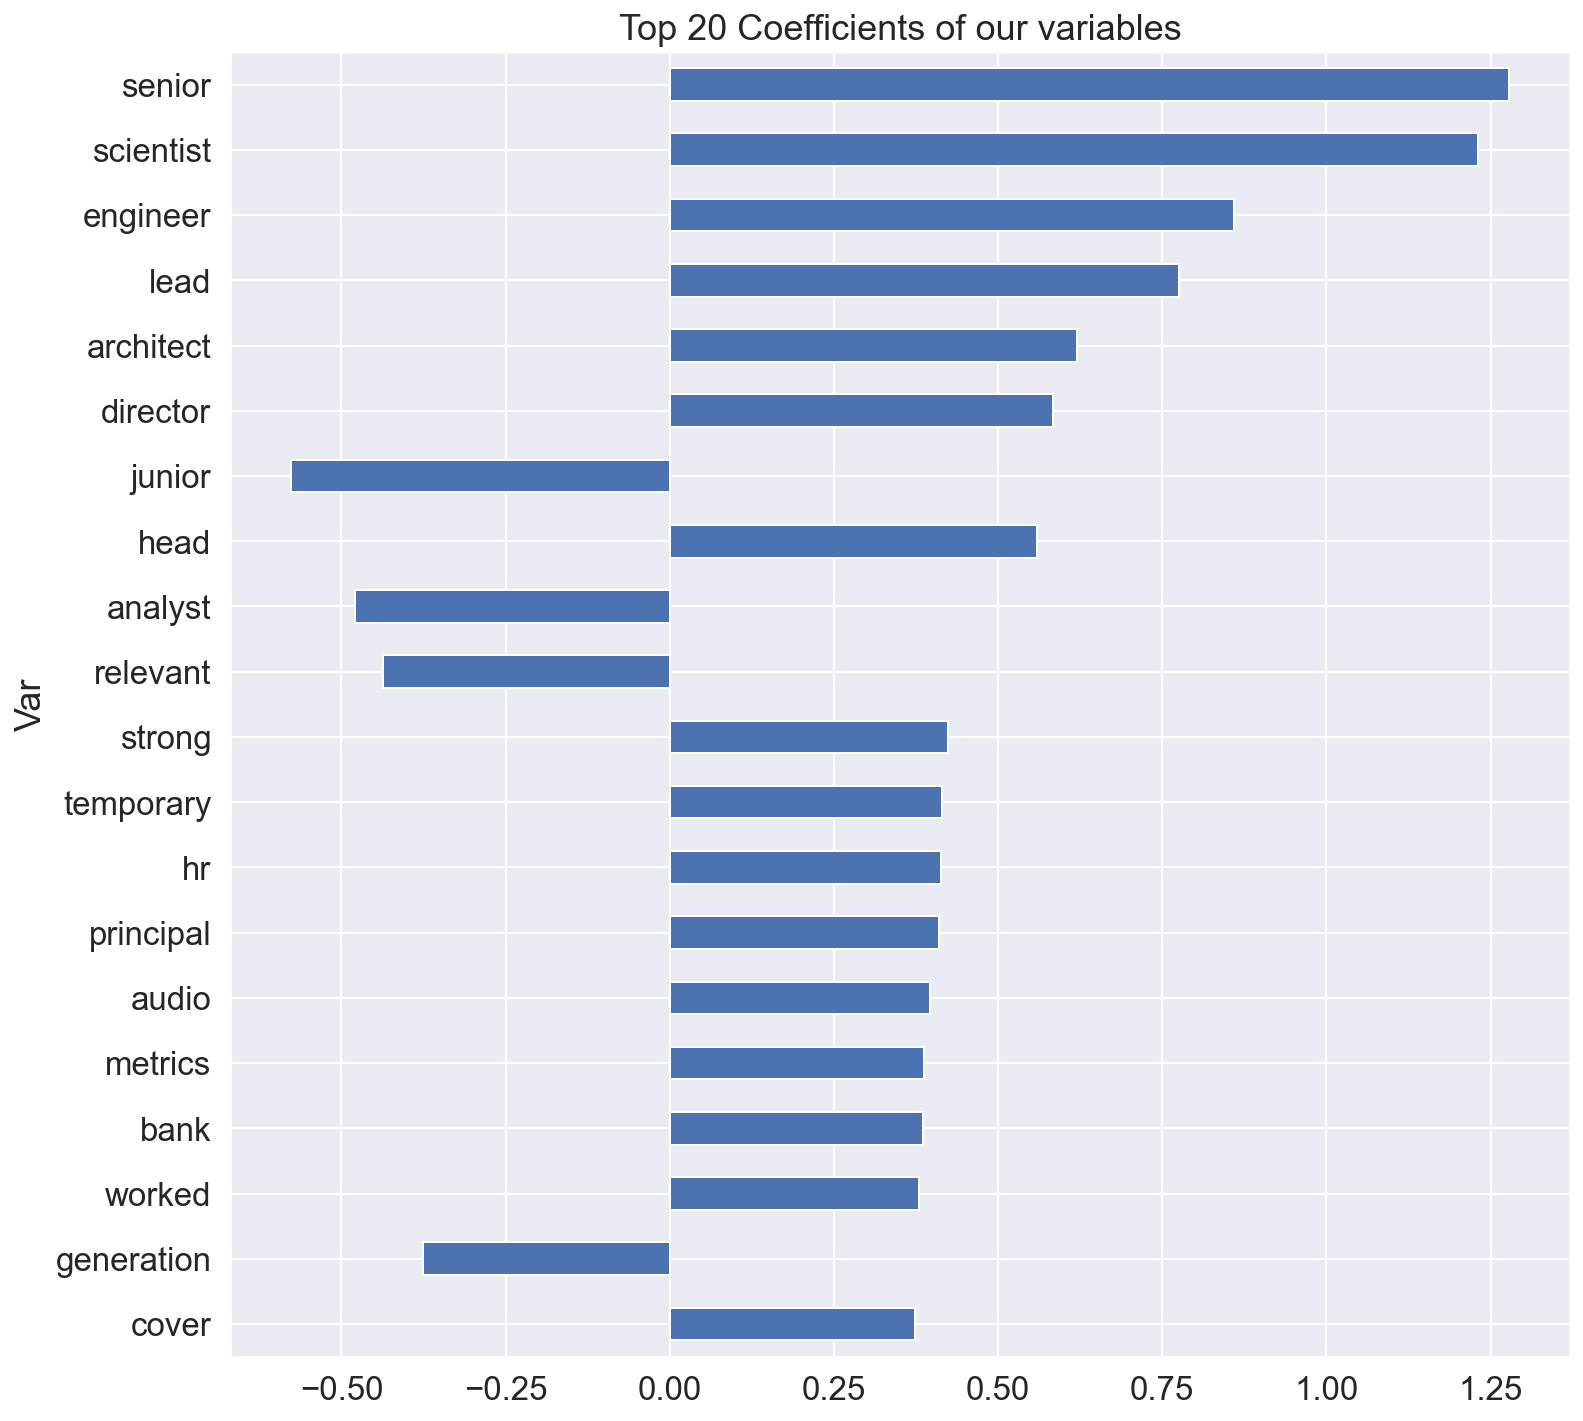

In [183]:
Coeff.head(20).plot(kind='barh',x=0,y=1,figsize=(12,12),legend=False,title='Top 20 Coefficients of our variables', sort_columns=True)
plt.gca().invert_yaxis()

The most impact on Salary HILO in the bar chart above are the words:senior,scientist,engineer,lead, a few more and less or no  impact words:junior, generation,analyst.

In [184]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train, y_train)
print("Knn CV score:", cross_val_score(knn, X_train, y_train, cv=5).mean())
print("Knn Train:", knn.score(X_train, y_train))
print("Knn Test:", knn.score(X_test, y_test))

Knn CV score: 0.6013651877133106
Knn Train: 0.7904436860068259
Knn Test: 0.6485013623978202


In [185]:
DTC = DecisionTreeClassifier(max_depth=4,criterion='gini')
DTC.fit(X_train, y_train)
print("DTC CV score:", cross_val_score(DTC, X_train, y_train, cv=5).mean())
print("DTC Train:", DTC.score(X_train, y_train))
print("DTC Test:", DTC.score(X_test, y_test))

DTC CV score: 0.6750853242320819
DTC Train: 0.6914675767918089
DTC Test: 0.6839237057220708


In [186]:
RFC = RandomForestClassifier(
                           n_estimators=100,
                           random_state=1)
RFC.fit(X_train, y_train)
print("RFC CV score:", cross_val_score(RFC, X_train, y_train, cv=5).mean())
print("RFC Train:", RFC.score(X_train, y_train))
print("RFC Test:", RFC.score(X_test, y_test))

RFC CV score: 0.7303754266211604
RFC Train: 1.0
RFC Test: 0.7411444141689373


In [188]:
# Set up the parameters.
# Usind a list with 'l1' and 'l2' for the penalties,
# Using a list with 'liblinear' for the solver,
# Using a logspace from -3 to 0, with 50 different values

# fill the dictionary of parameters
params = {'penalty': ['l1', 'l2'],
          'C': np.logspace(-3, 0, 50),
          'fit_intercept': [True, False],
          'solver': ['liblinear']}
# create your gridsearch object
loggs = GridSearchCV(estimator=log,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)
loggs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr', penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
       0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
       0.01676833, 0.019...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='

In [189]:
print('Best parsms:', loggs.best_params_)
#printing out the best parameters

Best parsms: {'C': 0.001, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'liblinear'}


In [190]:
lbe=loggs.best_estimator_
lbe

LogisticRegression(C=0.001, fit_intercept=False, multi_class='ovr',
                   solver='liblinear')

In [191]:
lbs=loggs.best_score_
print('Cross val score:', lbs)

Cross val score: 0.7508532423208191


In [192]:
print('Best Train score:',log.score(X_train, y_train))

Best Train score: 1.0


The model fits so well in a data with lots of variance it causes over-fitting.

In [193]:
print('Best Test score:',log.score(X_test, y_test))

Best Test score: 0.7275204359673024


In [210]:
coeff = pd.DataFrame(list(zip(X2.columns,lbe.coef_[0], np.abs(lbe.coef_[0]))), columns=['Var','Coef', 'Coef_abs']).sort_values(by='Coef_abs', ascending=False)
coeff.head()

,Var,Coef,Coef_abs
835,scientist,0.055922,0.055922
86,analyst,-0.048584,0.048584
844,senior,0.041128,0.041128
514,junior,-0.040821,0.040821
531,lead,0.039464,0.039464


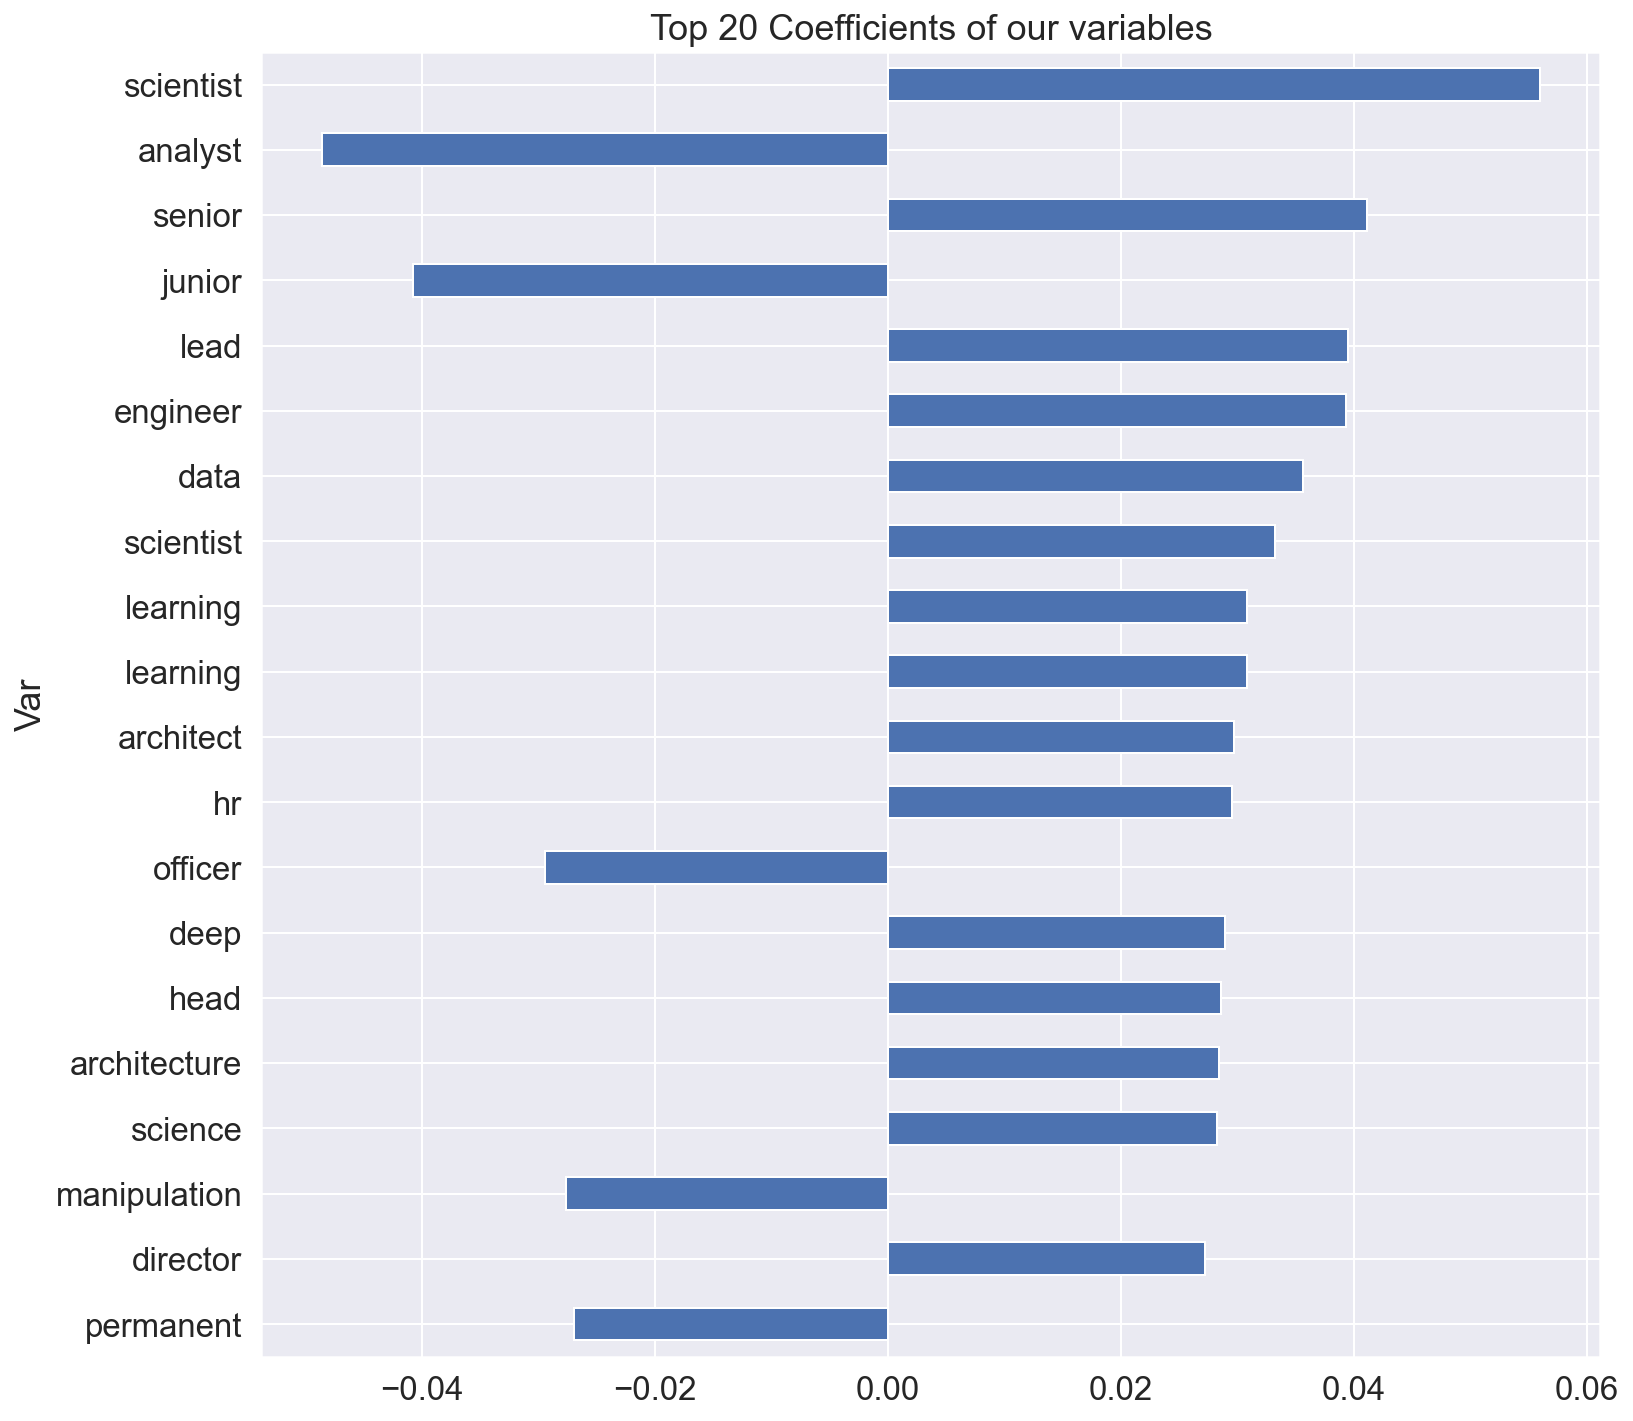

In [211]:
coeff.head(20).plot(kind='barh',x=0,y=1,figsize=(12,12),legend=False,title='Top 20 Coefficients of our variables', sort_columns=True)
plt.gca().invert_yaxis()



In [196]:
param_grid = {'max_depth': [3, 5, 10],
             'min_samples_split': [2, 5, 10]}
DTC_gridsearch = GridSearchCV(DTC,
                              param_grid,
                              n_jobs=2, 
                              cv=5, 
                              verbose=1, 
                              return_train_score=True)

DTC_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4), n_jobs=2,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, verbose=1)

Houston,TX shows the highest impact

In [197]:
DTC_gridsearch.param_grid

{'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}

In [198]:
DTCBS=DTC_gridsearch.best_score_
print('Best score:', DTCBS)

Best score: 0.6812286689419795


In [199]:
DTCBE=DTC_gridsearch.best_estimator_
print('Best estimator:', DTCBE)

Best estimator: DecisionTreeClassifier(max_depth=10)


In [200]:
# assign your best_estimator_ to the variable, then use .score( ) on your testing data
# assign your best_estimator_ to the variable, then use .score( ) on your testing data
print(DTCBE.score(X_train, y_train))
print(DTCBE.score(X_test, y_test))

0.7624573378839591
0.7275204359673024


In [201]:
predictions = DTCBE.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
pd.DataFrame(confusion,
             columns=['Predicted High', 'Predicted Low'],
             index=['High', 'Low'])

,Predicted High,Predicted Low
High,111,70
Low,30,156


In [202]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       186
           1       0.79      0.61      0.69       181

    accuracy                           0.73       367
   macro avg       0.74      0.73      0.72       367
weighted avg       0.74      0.73      0.72       367



### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

In [212]:
## YOUR CODE HERE
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores_shuffled = cross_val_score(DTC, X_train, y_train, cv=kf)

print('Cross validation score:', cv_scores_shuffled)
print('Mean cross validation score:', cv_scores_shuffled.mean())

Cross validation score: [0.68259386 0.65870307 0.71331058 0.66211604 0.6552901 ]
Mean cross validation score: 0.6744027303754266


In [204]:
scores = []
max_k = 121
for k in range(1, max_k):
    
    scores.append(np.mean(cross_val_score(DTC, X2, y2, cv=5)))

In [205]:
np.argmax(scores)+1, max(scores)

(102, 0.5317044117866023)

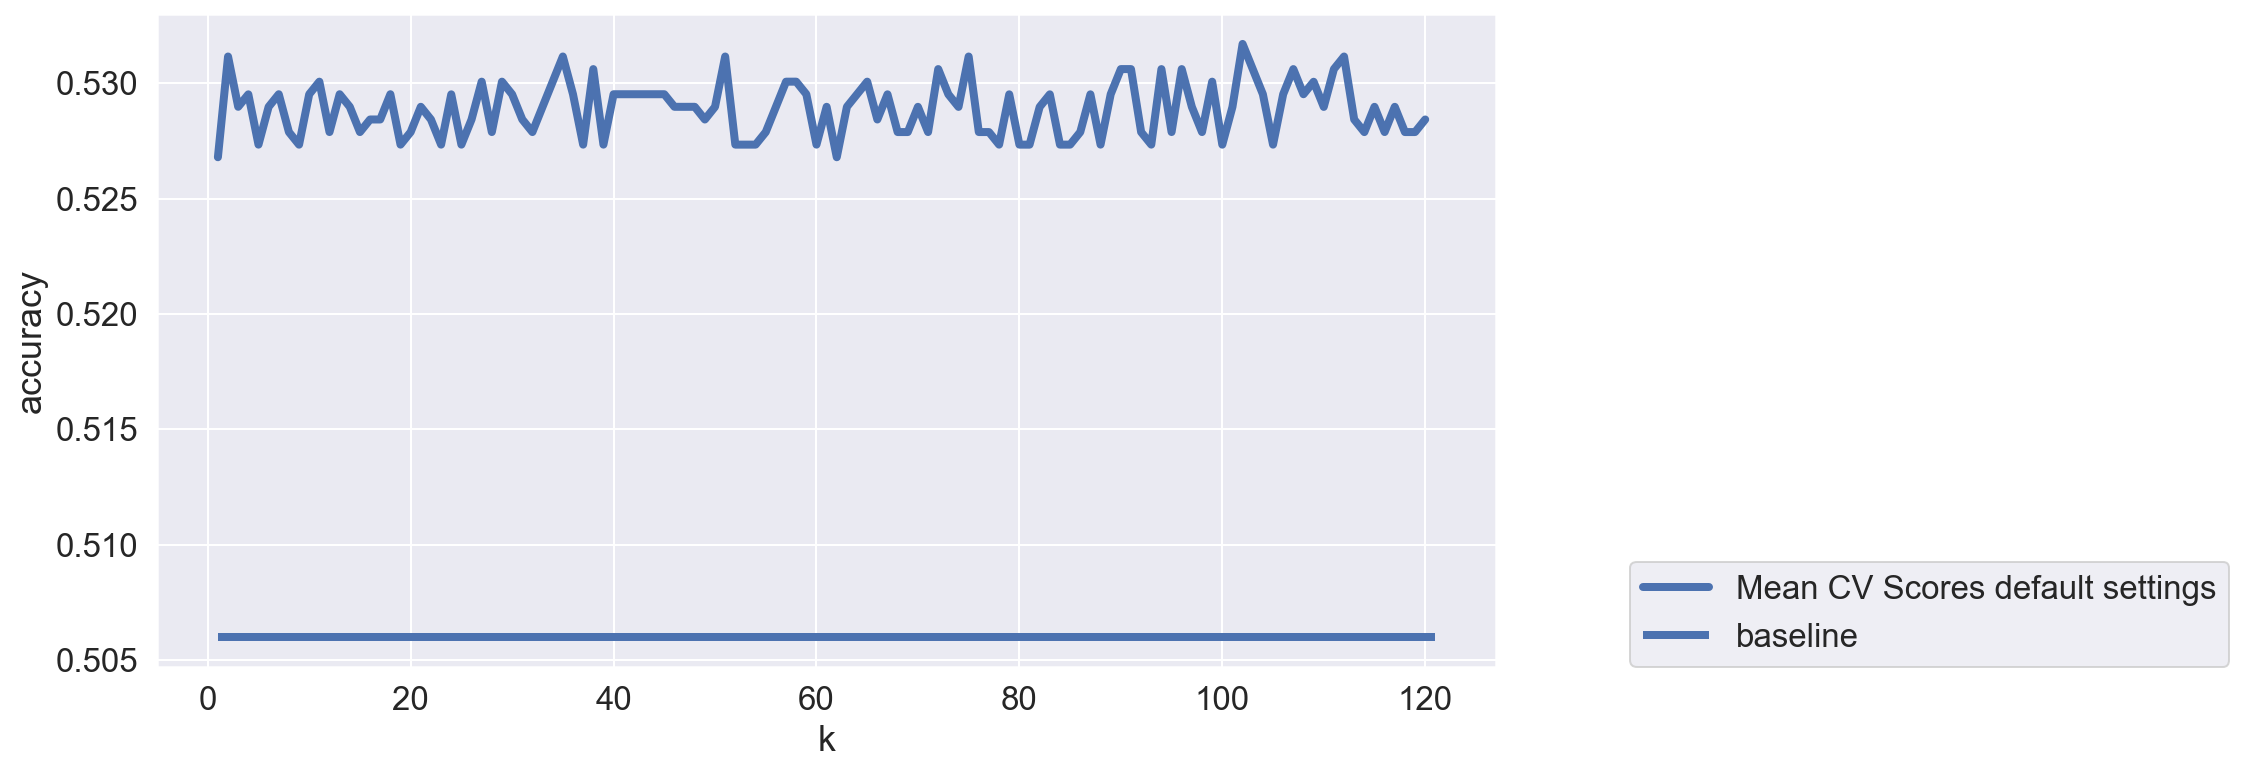

In [207]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(range(1, max_k), scores, label='Mean CV Scores default settings', lw=4)
ax.hlines(y.value_counts(normalize=True).max(), 1, max_k, label='baseline', lw=4)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.legend(loc=[1.1, 0])
plt.show()

In [208]:
probabilities = loggs.predict_proba(X_test)
len(probabilities)

367

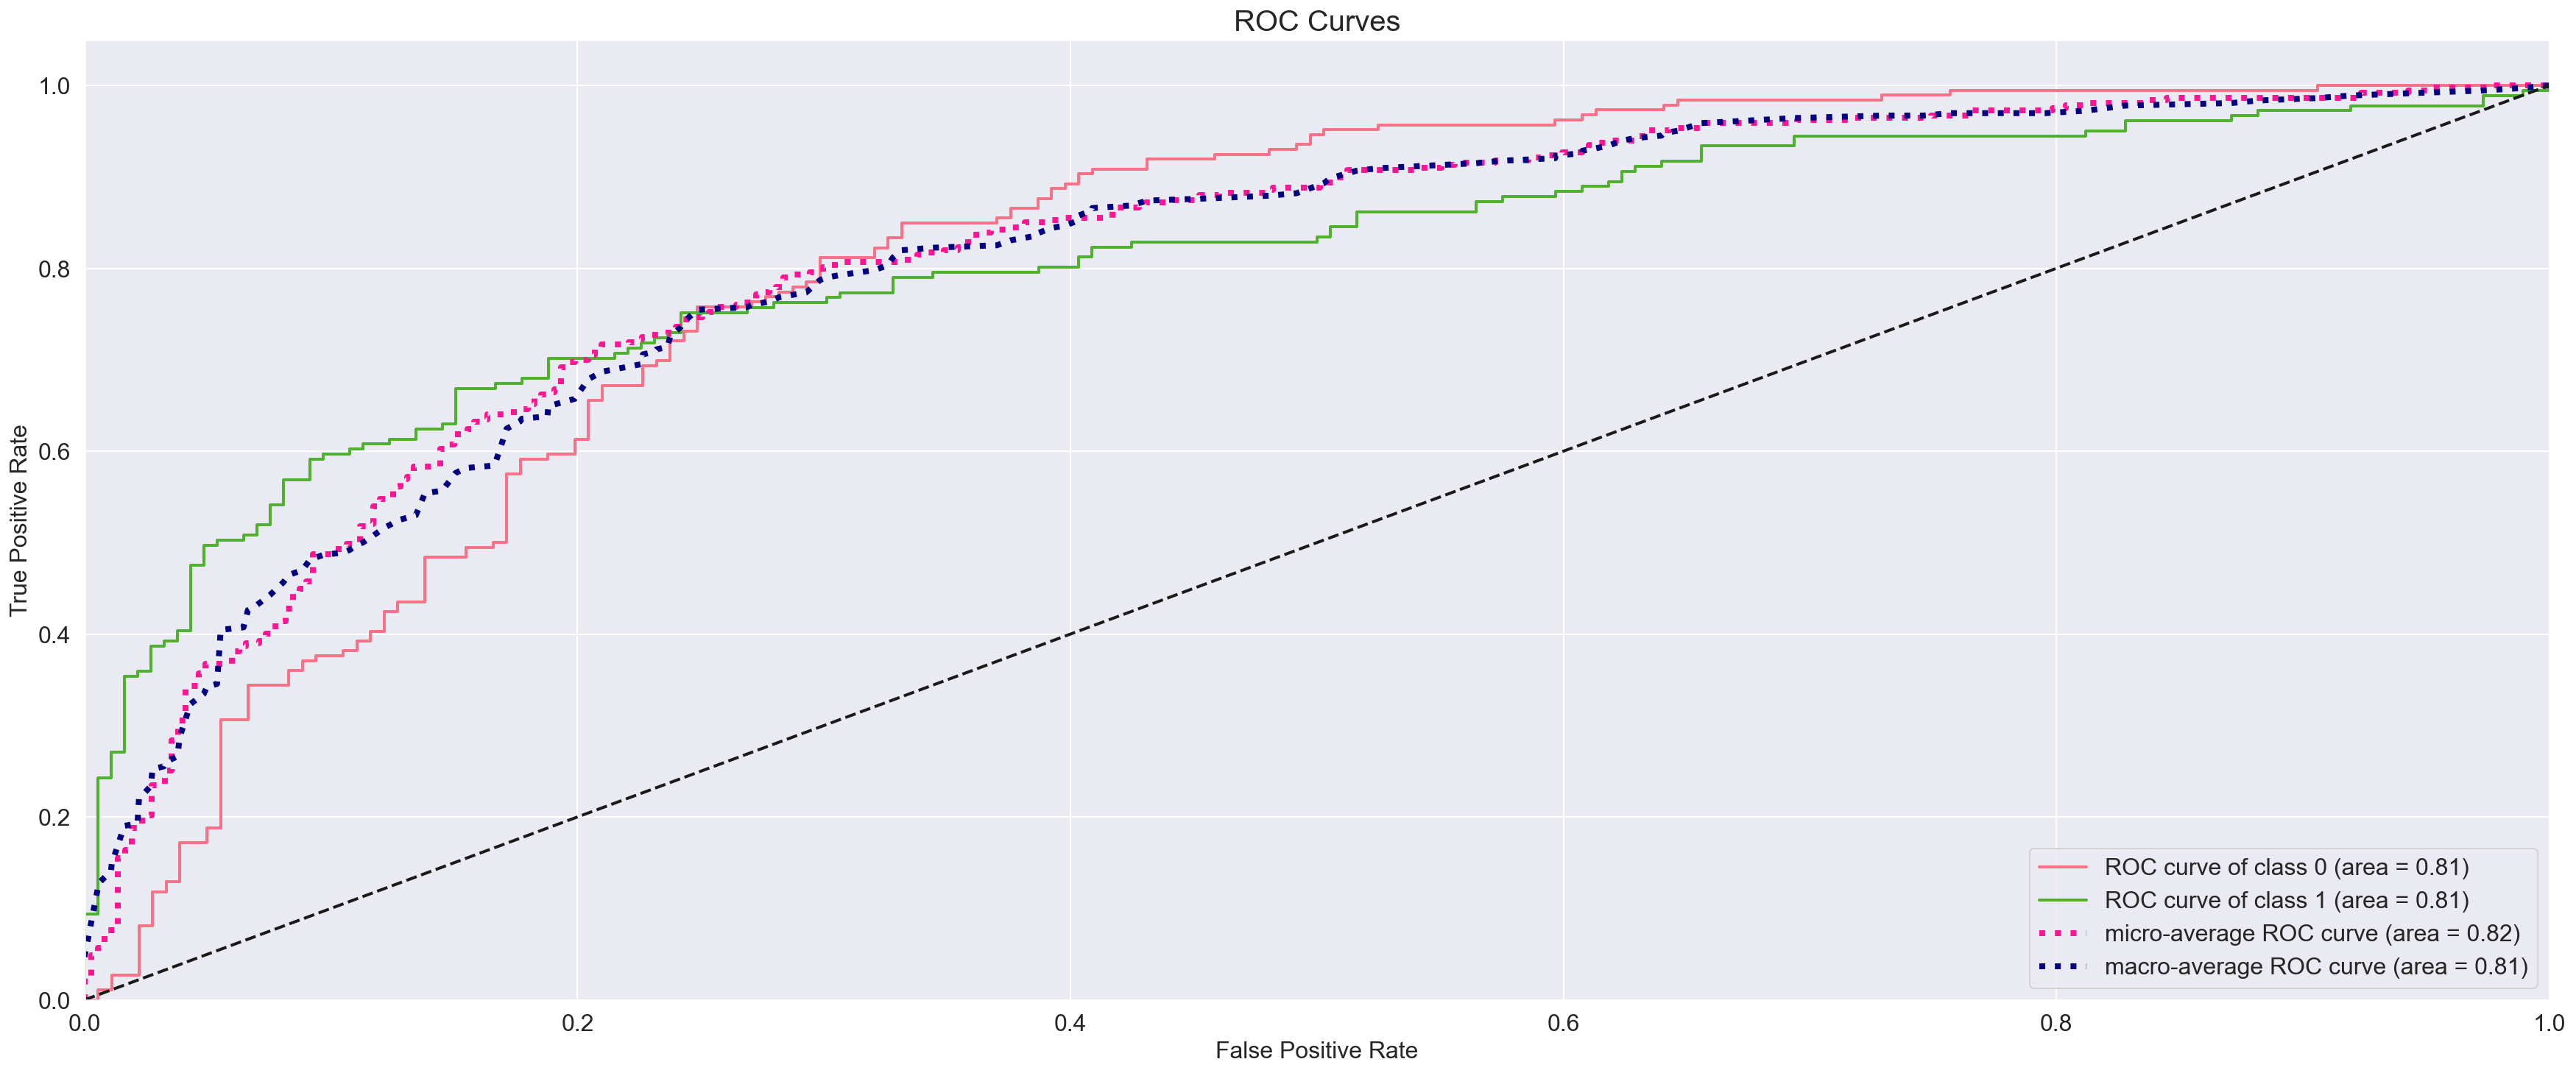

In [209]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
cmap = ListedColormap(sns.color_palette("husl",3))

skplt.metrics.plot_roc(y_test, probabilities, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(30,12), cmap=cmap)
plt.show()

Conclusion:
After determining the job title and Summary to create predictors for my models I ran Logistic Regression, KNN classifier, DTC, RFC on my training data. After using a GridSearch to find the optimal parameters for GridSearch on Logistics Regression and GridSearch on Descission Tree Classifier, the best score achieved on my  data for the Logistic Regression model is 75%,the best score for the DTC model was 68%,
Therefore TP is Low Salary and TN is High Salary;FP is Predicted Higher Salary than FN Predicted Lower Salary.
The confusion matrix provide a compromise balancing  to adjust the threshold:
TP=True Positive=111/,TN=True Negative=156,FP=False Positive=70,FN=False Negative=30
For Random Forest Classifier:TP=True Positive=123/,TN=True Negative=126,FP=False Positive=58,FN=False Negative=60.
Per graphs shown above the Log.Reg. Model coefficients are indicating predictors of a lower Salary in keywords,such:Education, Research, Graduate, on the other hand predictors for higher Salary in keywords are:Scientist, Senior, Enjineer, Lead.All the rest key words are less frequently used for the job listings and are less influenced features in the Decision Tree.

The ROC Curve  plotted above for class 1 High Salary and class 0 Low Salary. As a matter of fact the Log. Reg. model is performing the baseline in the way that  as it increased the threshold to remove false positives, it will acquire less false negatives in relation to how many false positives will be lost.

ROC gives a visualisation of the increased number of false positives for each increase in true positives that my models predict.

